In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [203]:
business_data = pd.read_csv("C:\\Users\\konka\\OneDrive\\Pulpit\\Projekt_DS\\business.csv")

In [204]:
economy_data = pd.read_csv("C:\\Users\\konka\\OneDrive\\Pulpit\\Projekt_DS\\economy.csv")

In [205]:
business_data['class'] = "Business"

In [206]:
business_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


In [207]:
economy_data['class'] = "Economy"

In [208]:
economy_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [209]:
df = pd.concat([economy_data, business_data])

In [210]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [211]:
df["time_taken"].unique()

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

In [212]:
def convert_to_decimal(time_str):
    if "h m" in time_str:  # Sprawdzenie, czy format to "1.03h m"
        time_parts = time_str.replace('h m', '').split('.')
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        return round(hours + minutes / 60.0, 2)
    else:  # Domyślny format "03h 45m"
        hours, minutes = map(int, time_str.replace('h', '').replace('m', '').split())
        return round(hours + minutes / 60.0, 2)

In [213]:
df["duration"] = df["time_taken"].apply(convert_to_decimal)

In [214]:
df["date"] = pd.to_datetime(df["date"], format='%d-%m-%Y')

In [215]:
# Data do porównania
target_date = pd.Timestamp('2022-02-10')

# Funkcja do obliczenia liczby dni do daty docelowej
def days_to_target(row_date, target_date):
    delta = row_date - target_date
    return delta.days

# Zastosowanie funkcji do kolumny 'date' i zapisanie wyników w nowej kolumnie 'days'
df['days'] = df['date'].apply(lambda x: days_to_target(x, target_date))

In [216]:
df["stop"].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [217]:
def create_stop_2_column(df):
    def map_stops(word):
        if isinstance(word, str):
            if 'non-stop' in word:
                return 'zero'
            elif '1-stop' in word:
                return 'one'
            elif '2+-stop' in word:
                return 'two_plus'
        return None  # Dla wartości, które nie pasują do żadnego z powyższych warunków

    df['stop_2'] = df['stop'].apply(map_stops)

In [218]:
create_stop_2_column(df)

In [219]:
def categorize_time(time_str):
    # Konwersja godziny do liczby całkowitej
    hour = int(time_str.split(":")[0])

    # Podział na pory dnia
    if 0 <= hour < 4:
        return 'Late_Night'
    elif 4 <= hour < 8:
        return 'Early_Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [220]:
df['departure_time'] = df['dep_time'].apply(categorize_time)
df["arrival_time"] = df['arr_time'].apply(categorize_time)

In [221]:
df["price"] = df["price"].str.replace(",", "").astype(float)

In [222]:
inr_pln_exchange = 0.05

In [223]:
df["price_pln"] = df["price"] * inr_pln_exchange

In [224]:
df["flight"] = df["ch_code"].astype(str) + "-" + df["num_code"].astype(str)

In [225]:
rename_column = {"from" : "source_city", "to" : "destination_city", "stop_2" : "stops", "days" : "days_left"}

In [226]:
df.rename(columns=rename_column, inplace=True)

In [227]:
df.head()

,date,airline,ch_code,num_code,dep_time,source_city,time_taken,stop,arr_time,destination_city,price,class,duration,days_left,stops,departure_time,arrival_time,price_pln,flight
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953.0,Economy,2.17,1,zero,Evening,Night,297.65,SG-8709
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953.0,Economy,2.33,1,zero,Early_Morning,Morning,297.65,SG-8157
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956.0,Economy,2.17,1,zero,Early_Morning,Early_Morning,297.80,I5-764
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955.0,Economy,2.25,1,zero,Morning,Afternoon,297.75,UK-995
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955.0,Economy,2.33,1,zero,Morning,Morning,297.75,UK-963


In [228]:
choosen_column = ["airline", "flight", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class", "duration", "days_left", "price_pln"]

In [229]:
df = df[choosen_column]

In [230]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price_pln
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,297.65
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,297.65
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,297.80
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,297.75
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,297.75


In [231]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique value for {column} is {unique_values}")
    print("-" * 100)

Unique value for airline is ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
----------------------------------------------------------------------------------------------------
Unique value for flight is ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
----------------------------------------------------------------------------------------------------
Unique value for source_city is ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
----------------------------------------------------------------------------------------------------
Unique value for departure_time is ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
----------------------------------------------------------------------------------------------------
Unique value for stops is ['zero' 'one' 'two_plus']
----------------------------------------------------------------------------------------------------
Unique value for arrival_time is ['Nig

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300261 non-null  object 
 1   flight            300261 non-null  object 
 2   source_city       300261 non-null  object 
 3   departure_time    300261 non-null  object 
 4   stops             300261 non-null  object 
 5   arrival_time      300261 non-null  object 
 6   destination_city  300261 non-null  object 
 7   class             300261 non-null  object 
 8   duration          300261 non-null  float64
 9   days_left         300261 non-null  int64  
 10  price_pln         300261 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 27.5+ MB


In [233]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price_pln           0
dtype: int64

In [234]:
print(df['airline'].value_counts())

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


In [243]:
print(df['airline'].value_counts(normalize=True)*100)

Vistara      42.582620
Air India    26.941228
Indigo       14.360839
GO FIRST      7.718951
AirAsia       5.361336
SpiceJet      3.001056
StarAir       0.020316
Trujet        0.013655
Name: airline, dtype: float64


<Axes: xlabel='airline', ylabel='count'>

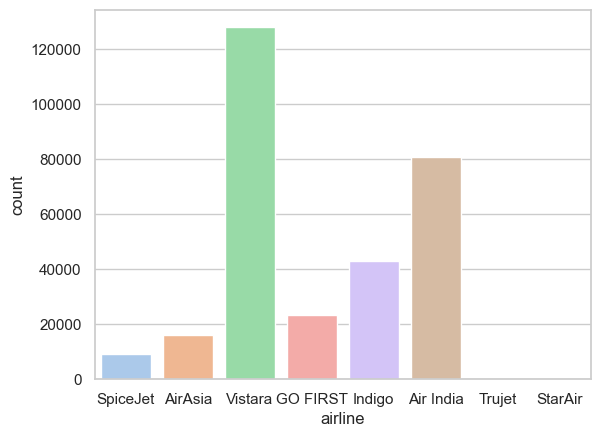

In [292]:
sns.countplot(data=df, x="airline", palette="pastel")

<Axes: xlabel='airline', ylabel='count'>

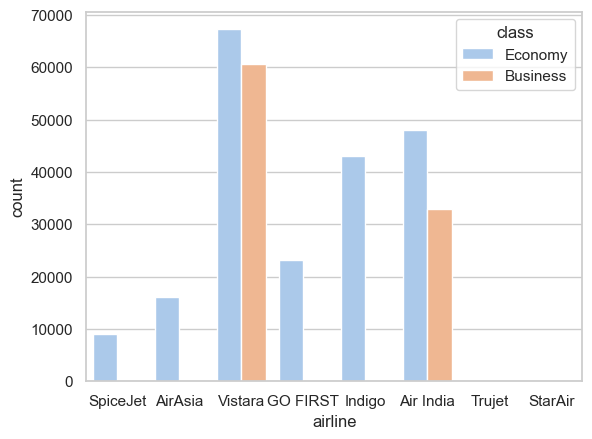

In [247]:
sns.countplot(data=df, x="airline", palette="pastel", hue="class")

<Axes: xlabel='duration', ylabel='price_pln'>

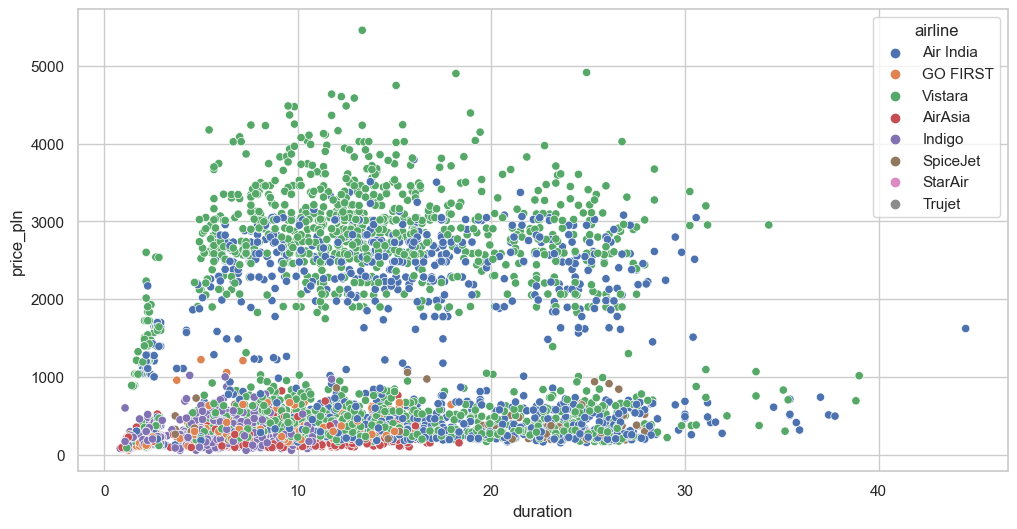

In [306]:
df_sample = df.sample(n=5000)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sample, x="duration", y="price_pln", hue='airline')

<Axes: xlabel='price_pln', ylabel='Count'>

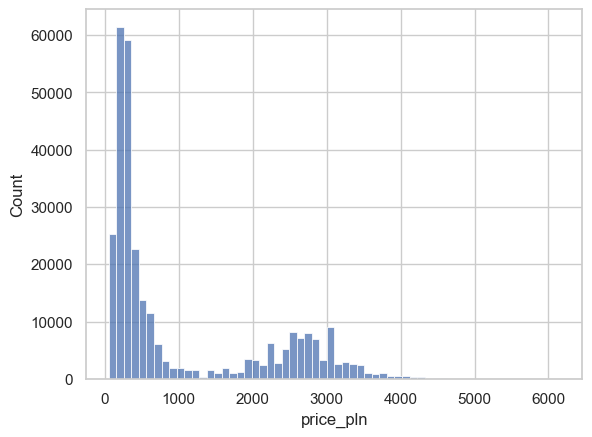

In [303]:
sns.histplot(df['price_pln'], bins=60)

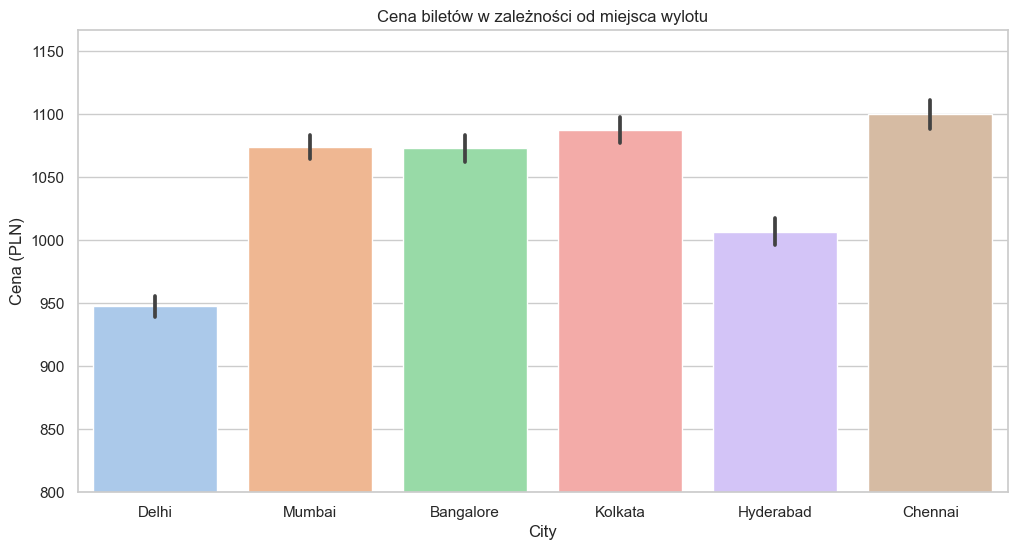

In [250]:
plt.figure(figsize=(12, 6))
sns.barplot(x='source_city', y='price_pln', data=df, palette="pastel")
plt.title('Cena biletów w zależności od miejsca wylotu')
plt.xlabel('City')
plt.ylabel('Cena (PLN)')
plt.ylim(800, None)
plt.show()

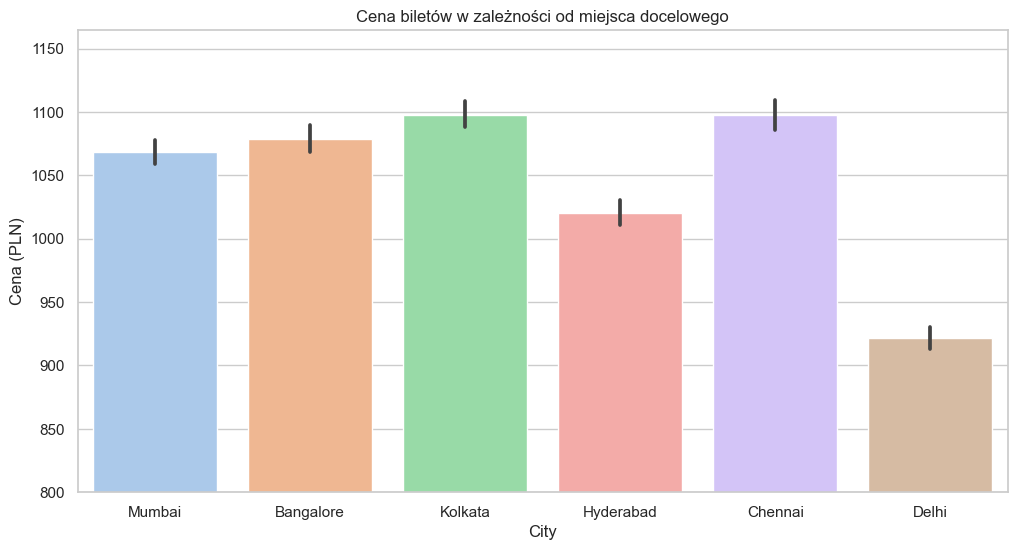

In [251]:
plt.figure(figsize=(12, 6))
sns.barplot(x='destination_city', y='price_pln', data=df, palette="pastel")
plt.title('Cena biletów w zależności od miejsca docelowego')
plt.xlabel('City')
plt.ylabel('Cena (PLN)')
plt.ylim(800, None)
plt.show()

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip")

In [252]:
def prepare_route_data(df):
    # Tworzenie kolumny trasy
    routes = df[["source_city", "destination_city", "price_pln"]].copy()
    routes["route"] = routes["source_city"] + "-" + routes["destination_city"]
    
    # Obliczenie średniej ceny dla każdej trasy
    average_route_price = routes.groupby('route')['price_pln'].mean().reset_index()
    
    # Sortowanie tras tak, aby trasy były sparowane
    average_route_price['sort_key'] = average_route_price['route'].apply(lambda x: tuple(sorted(x.split('-'))))
    average_route_price = average_route_price.sort_values(by=['sort_key', 'route'], ascending=[True, False])
    
    # Usunięcie kolumny sort_key i zaokrąglenie wartości ceny do 2 miejsc po przecinku
    average_route_price = average_route_price.drop(columns='sort_key').reset_index(drop=True)
    average_route_price['price_pln'] = average_route_price['price_pln'].round(2)
    
    return average_route_price

# Użycie funkcji
paired_routes = prepare_route_data(df)
paired_routes


,route,price_pln
0,Chennai-Bangalore,1254.09
1,Bangalore-Chennai,1166.09
2,Delhi-Bangalore,894.01
3,Bangalore-Delhi,886.17
4,Hyderabad-Bangalore,1062.30
5,Bangalore-Hyderabad,1057.60
6,Kolkata-Bangalore,1137.24
7,Bangalore-Kolkata,1174.91
8,Mumbai-Bangalore,1157.39
9,Bangalore-Mumbai,1156.36


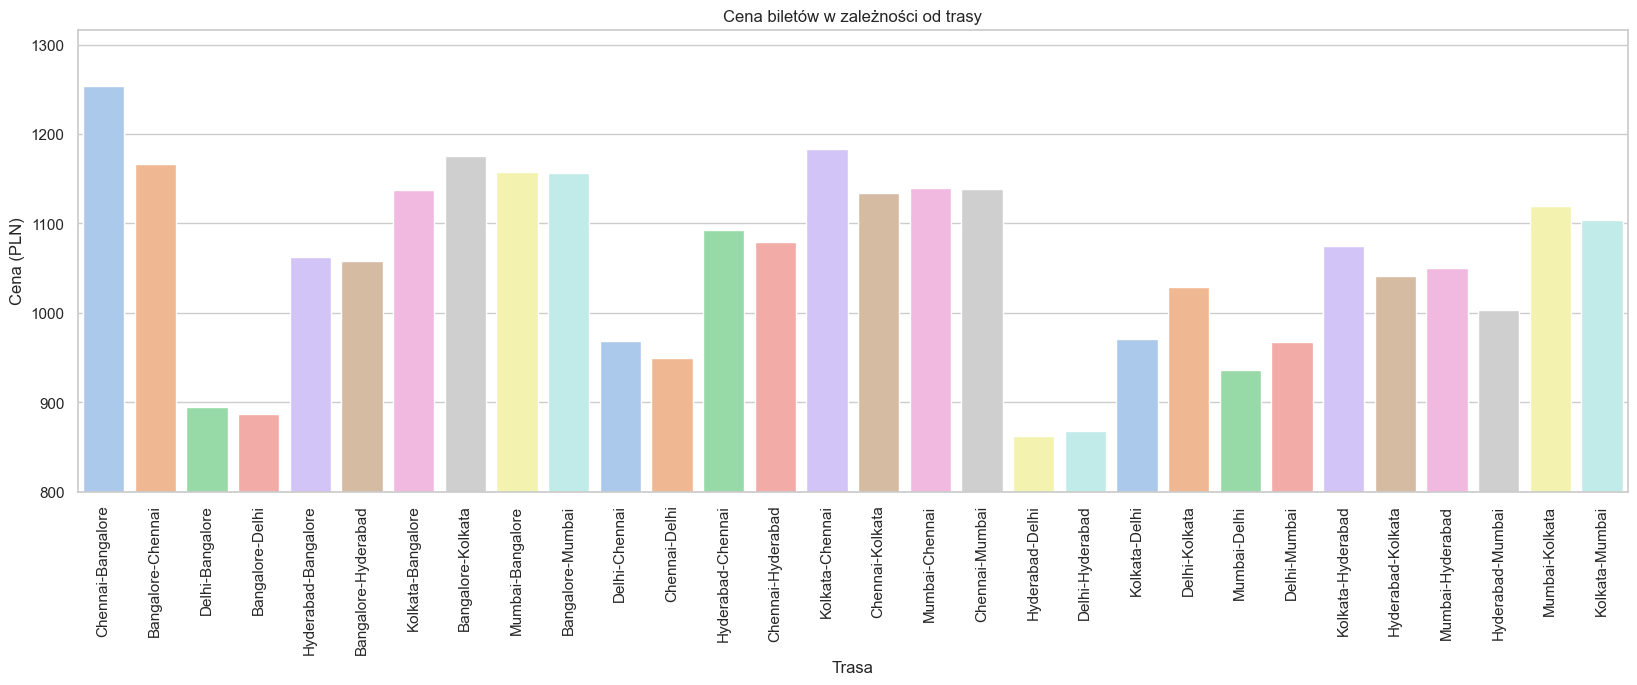

In [253]:
plt.figure(figsize=(20, 6))
sns.barplot(x='route', y='price_pln', data=paired_routes, palette="pastel")

plt.title('Cena biletów w zależności od trasy')
plt.xlabel('Trasa')
plt.ylabel('Cena (PLN)')
plt.xticks(rotation=90)
plt.ylim(800, None)
plt.show()

Text(0, 0.5, 'Cena (PLN)')

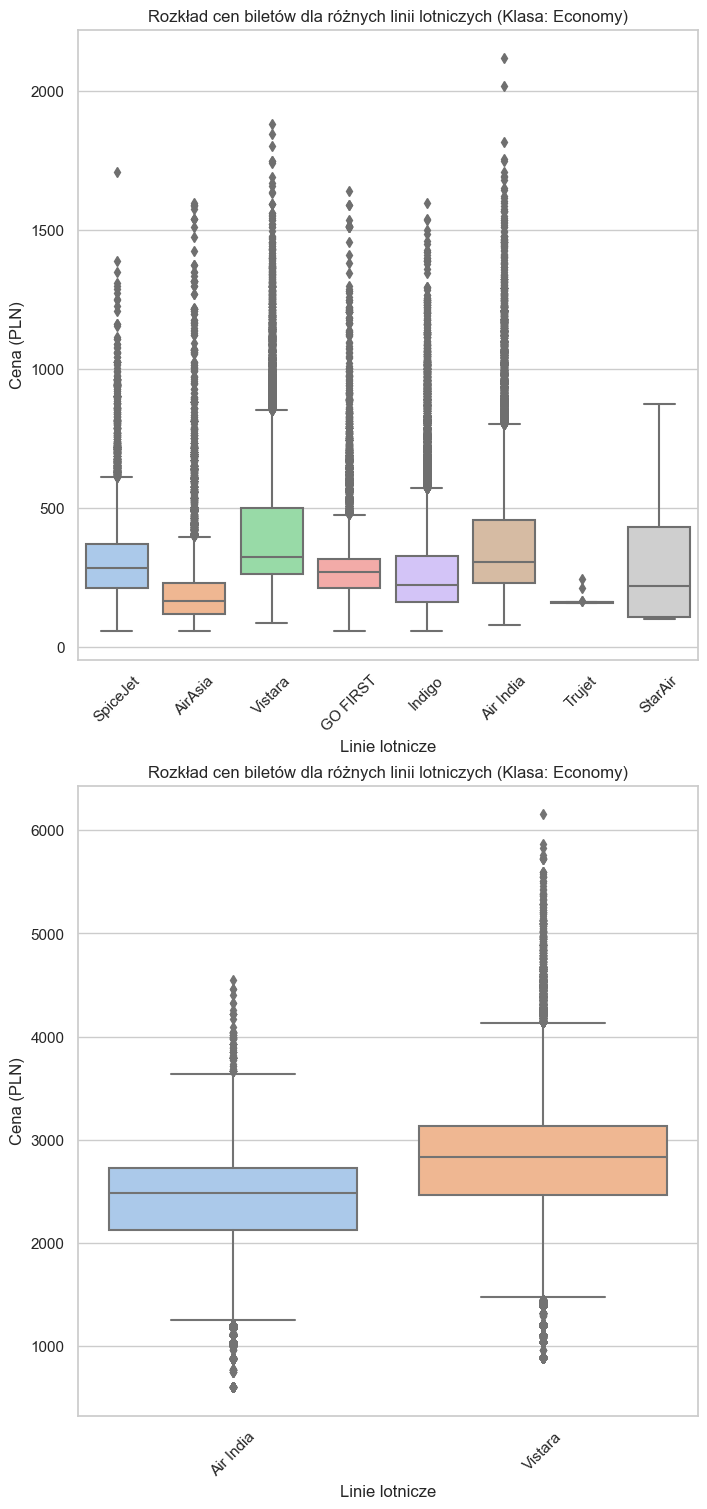

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_df = df[df["class"] == "Economy"]
filtered_df_2 = df[df["class"] == "Business"]
# Filtruj df, aby zawierało tylko wiersze z klasą "Economy"

plt.figure(figsize = (8,18))
plt.subplot(2,1,1)
sns.set(style="whitegrid")
sns.boxplot(x='airline', y='price_pln', data=filtered_df, palette="pastel")
plt.title('Rozkład cen biletów dla różnych linii lotniczych (Klasa: Economy)')
plt.xticks(rotation=45)
plt.xlabel('Linie lotnicze')
plt.ylabel('Cena (PLN)')


plt.subplot(2,1,2)


sns.set(style="whitegrid")
sns.boxplot(x='airline', y='price_pln', data=filtered_df_2, palette="pastel")
plt.title('Rozkład cen biletów dla różnych linii lotniczych (Klasa: Economy)')
plt.xticks(rotation=45)
plt.xlabel('Linie lotnicze')
plt.ylabel('Cena (PLN)')



<Axes: xlabel='stops', ylabel='count'>

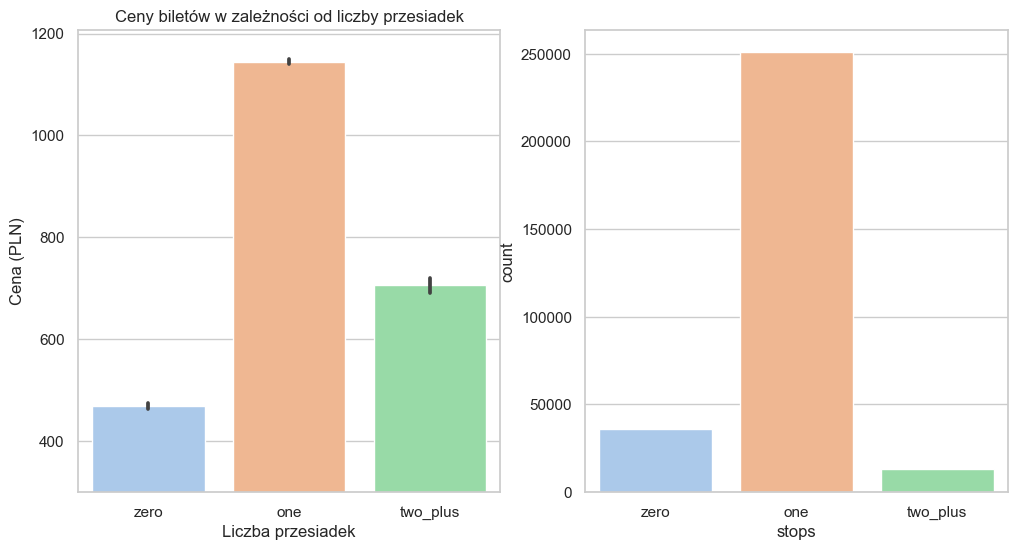

In [274]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x='stops', y='price_pln', data=df, palette="pastel")
plt.title('Ceny biletów w zależności od liczby przesiadek')
plt.xlabel('Liczba przesiadek')
plt.ylabel('Cena (PLN)')
plt.ylim(300, None)
plt.subplot(1,2,2)
sns.countplot(data=df, x="stops", palette="pastel")

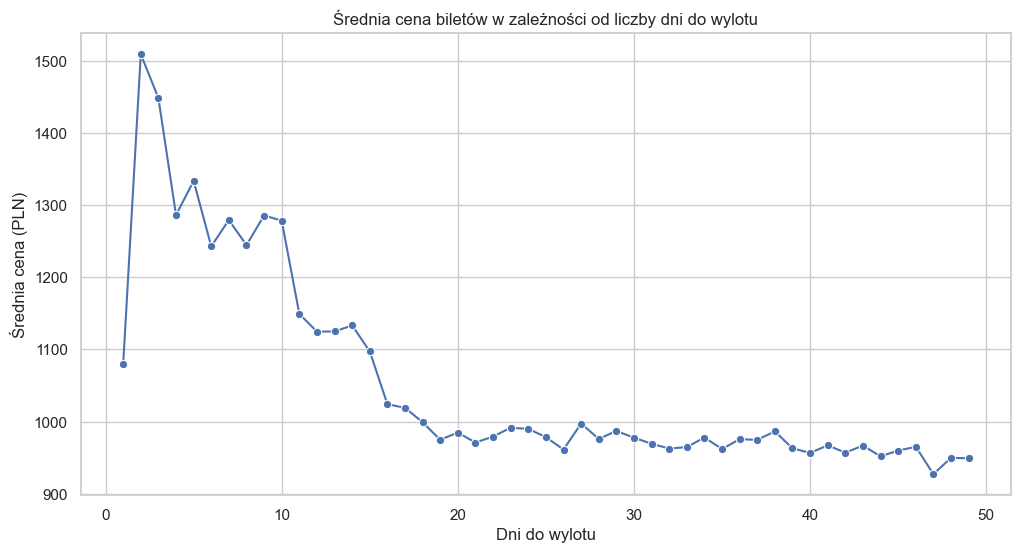

In [283]:


# Oblicz średnią cenę dla każdej wartości 'days_left'
avg_prices_days_left = df.groupby('days_left')['price_pln'].mean().reset_index()

# Rysuj wykres liniowy
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price_pln', data=avg_prices_days_left, palette="pastel", marker="o")
plt.title('Średnia cena biletów w zależności od liczby dni do wylotu')
plt.xlabel('Dni do wylotu')
plt.ylabel('Średnia cena (PLN)')
plt.grid(True)
plt.show()



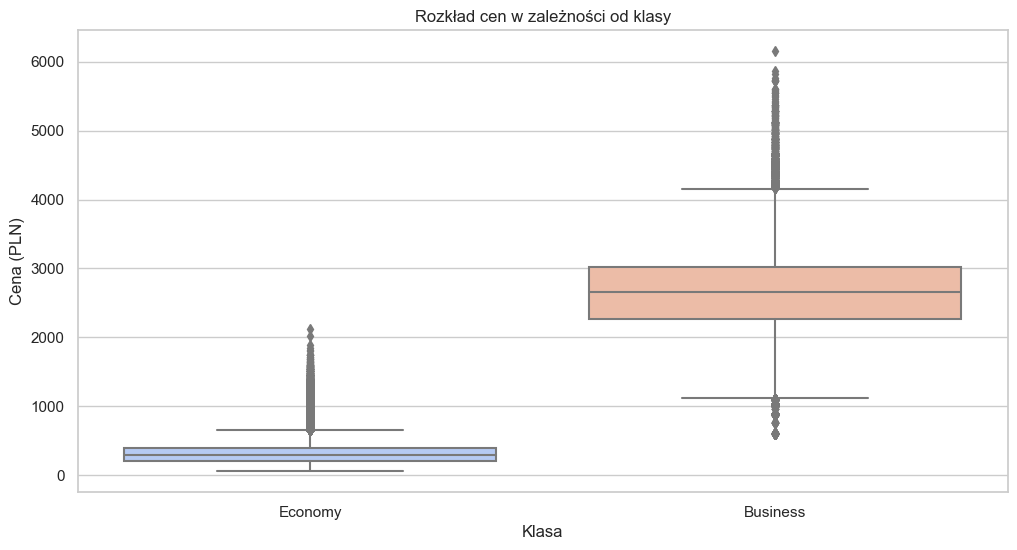

In [278]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='price_pln', data=df, palette="coolwarm")
plt.title('Rozkład cen w zależności od klasy')
plt.xlabel('Klasa')
plt.ylabel('Cena (PLN)')
plt.show()

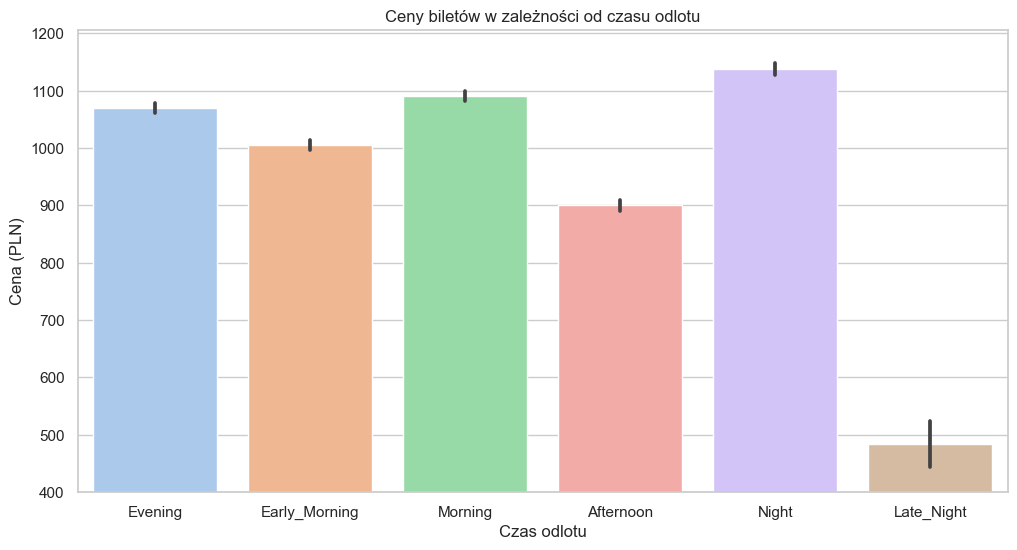

In [259]:
plt.figure(figsize=(12, 6))
sns.barplot(x='departure_time', y='price_pln', data=df, palette="pastel")
plt.title('Ceny biletów w zależności od czasu odlotu')
plt.xlabel('Czas odlotu')
plt.ylabel('Cena (PLN)')
plt.ylim(400, None)
plt.show()



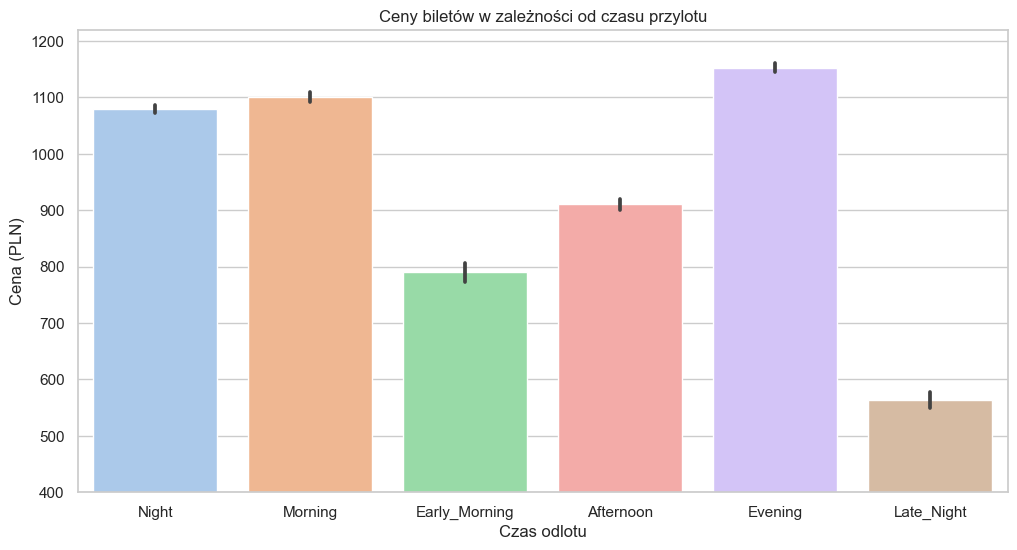

In [260]:
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_time', y='price_pln', data=df, palette="pastel")
plt.title('Ceny biletów w zależności od czasu przylotu')
plt.xlabel('Czas odlotu')
plt.ylabel('Cena (PLN)')
plt.ylim(400, None)
plt.show()

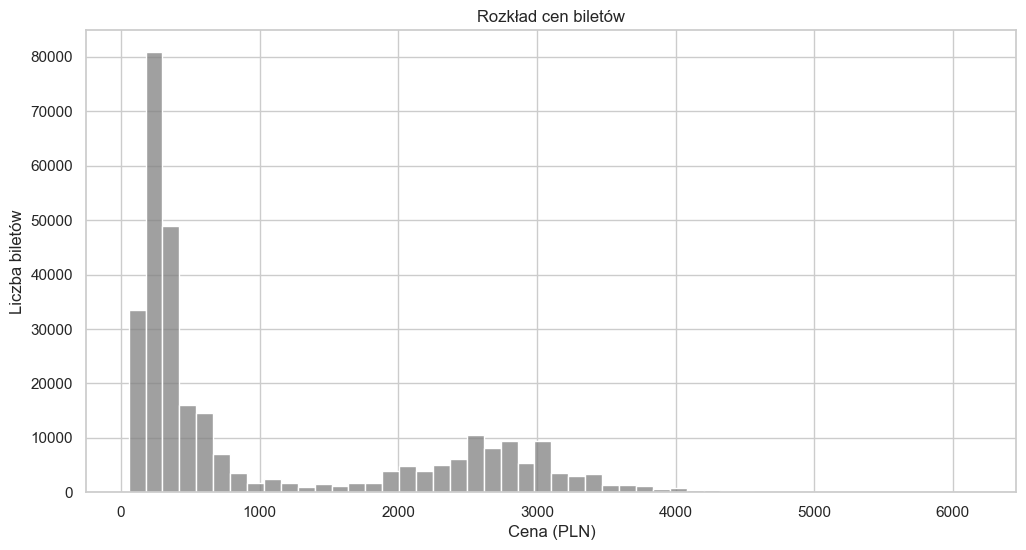

In [261]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price_pln'], bins=50, color="gray")
plt.title('Rozkład cen biletów')
plt.xlabel('Cena (PLN)')
plt.ylabel('Liczba biletów')
plt.show()


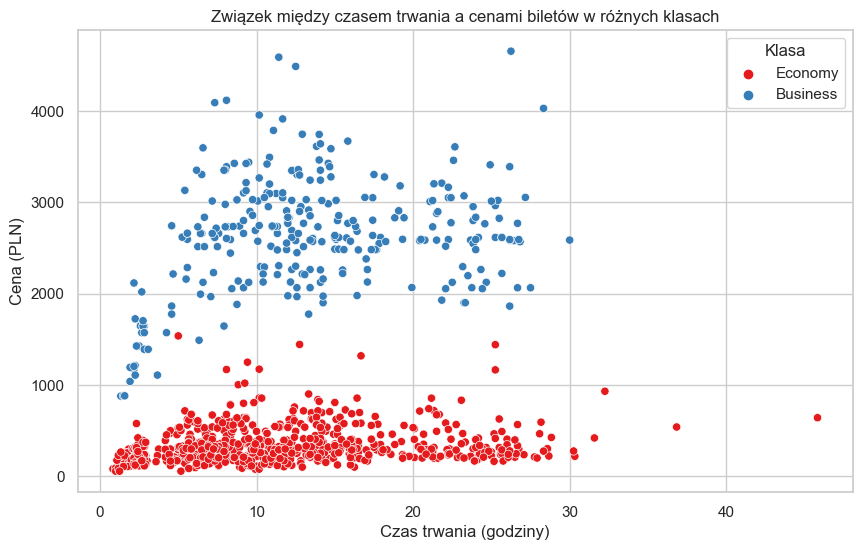

In [285]:
df_sample = df.sample(n=1000)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price_pln', hue='class', data=df_sample, palette='Set1')
plt.title('Związek między czasem trwania a cenami biletów w różnych klasach')
plt.xlabel('Czas trwania (godziny)')
plt.ylabel('Cena (PLN)')
plt.legend(title='Klasa')
plt.show()

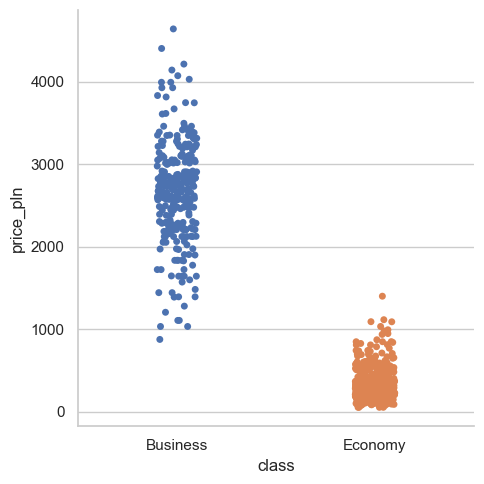

In [286]:
df_sample_2 = df.sample(n=1000)
sns.catplot(data=df_sample_2, x="class", y="price_pln", order=["Business", "Economy"])

In [307]:
num_features = ['duration', 'days_left']
cat_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [308]:
num_pipe = Pipeline([
    ("scaler", StandardScaler())
    ])

In [309]:
cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
    ])

In [310]:
preprocessor = ColumnTransformer([
    ("num_branch", num_pipe, num_features),
    ("cat_branch", cat_pipe, cat_features)
], remainder="drop")

In [311]:
from sklearn.model_selection import train_test_split
X = df.drop(["price_pln"], axis=1)
y = df["price_pln"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
     ])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
predicted_price = pipeline.predict(X_test)

In [ ]:

X_test_with_predictions = X_test.copy()
X_test_with_predictions['predicted_price_pln'] = predicted_price

In [ ]:
X_test_with_predictions.head()

In [ ]:
X_test_with_predictions.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_test_with_predictions['actual_price_pln'] = y_test


In [ ]:
X_test_with_predictions['actual_price_pln'] = y_test

In [ ]:
pd.set_option('display.max_rows', 100)
X_test_with_predictions.head(100)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, X_test_with_predictions['predicted_price_pln'])
print(f"Mean Squared Error: {mse}")


In [ ]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, X_test_with_predictions['predicted_price_pln'])
print(f"Mean Absolute Error: {mae}")


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
# Załóżmy, że 'model' to twój wytrenowany model, a 'preprocessor' to twój ColumnTransformer dla przetwarzania danych

# 1. Przygotowanie nowych danych
new_data = pd.DataFrame({
    'airline': ['SpiceJet'],
    'flight': ['SG-8709'],
    'source_city': ['Delhi'],
    'departure_time': ['Evening'],
    'stops': ['zero'],
    'arrival_time': ['Night'],
    'destination_city': ['Mumbai'],
    'class': ['Economy'],
    'duration': [2.17],
    'days_left': [1]
})

# 2. Transformacja nowych danych
# Upewnij się, że preprocessor został wytrenowany na danych treningowych przed tym krokiem
new_data_transformed = preprocessor.transform(new_data)

# 3. Predykcja
# Upewnij się, że model został wytrenowany na przetworzonych danych treningowych przed tym krokiem
predicted_price = model.predict(new_data_transformed)

# 4. Interpretacja wyników
print(f"Predicted price: {predicted_price[0]}")



In [ ]:
df.head()

In [ ]:
y_pred = model.predict(X_test_transformed)

In [ ]:
SpiceJet	SG-8709	Delhi	Evening	zero	Night	Mumbai	Economy	2.17	1	297.65

In [ ]:
score = model.score(X_test_transformed, y_test)
print("Accuracy: ", score)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

# Podział danych na zestaw treningowy i testowy
X = df.drop('price_pln', axis=1)
y = df['price_pln']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wyodrębnienie cech numerycznych i kategorialnych
num_features = ['duration', 'days_left']
cat_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Procesowanie cech numerycznych - normalizacja
num_transformer = StandardScaler()

# Procesowanie cech kategorialnych - one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Utworzenie końcowego przetwarzania danych przy użyciu ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Utworzenie pipeline'u
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', XGBRegressor())])

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Dopasowanie modelu
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print("Najlepsze hiperparametry: ", grid_search.best_params_)

# Wyświetlenie najlepszego wyniku
print("Najlepszy wynik: ", grid_search.best_score_)

# Użycie najlepszego modelu do predykcji na zestawie testowym
y_pred = grid_search.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Lista modeli do przetestowania
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor()),
    ("LightGBM", LGBMRegressor())
]

# Przetwarzanie wstępne danych
preprocessor = ColumnTransformer([
    ("num_branch", num_pipe, num_features),
    ("cat_branch", cat_pipe, cat_features)
], remainder="drop")

# Iteracja przez modele
for name, model in models:
    # Utworzenie pipeline dla danego modelu
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Trenowanie modelu
    pipeline.fit(X_train, y_train)

    # Ocenianie modelu (opcjonalnie)
    score = pipeline.score(X_test, y_test)
    print(f"Score for {name}: {score:.4f}")
